In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

# 1 iteration

In [2]:
immo_df = pd.read_csv("base_line.csv")
immo_df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


## Premiére observation

In [3]:
immo= immo_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

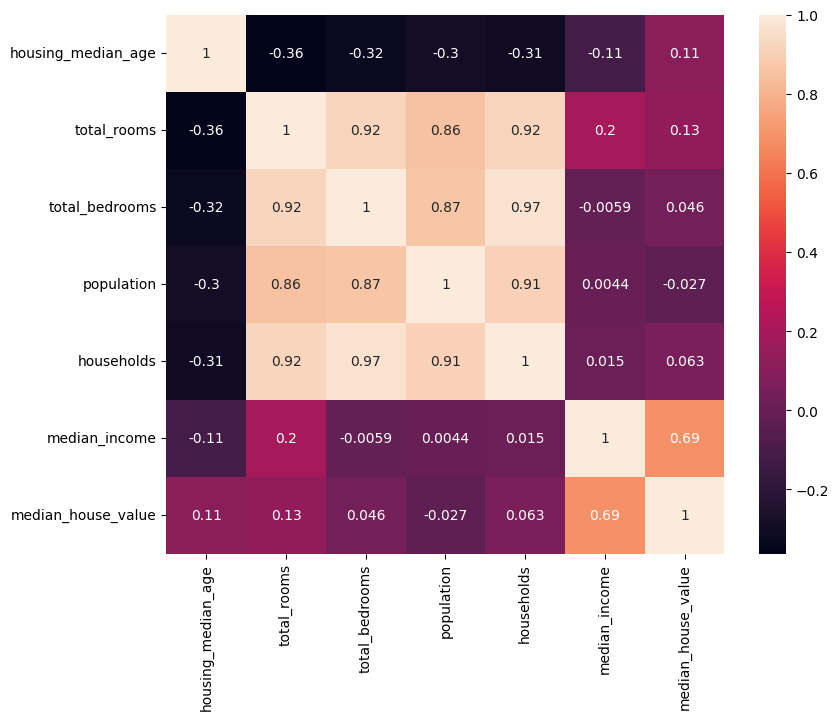

In [4]:
plt.figure(figsize=(9,7))
corr_matrix = immo.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Heatmap nous montre une correlation possible entre total_bedrooms/households(0.97), total_bedrooms/total_rooms (0.93),  total_rooms/households(0.92), population/households (0.91), total_bedrooms/population (0.88) et enfin population/total_rooms (0.86) et median_income/median_house_value (0.69). 

In [ ]:
g = sns.PairGrid(data = immo, corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

# 2 iteration

In [5]:
immo_df2 = pd.read_csv("immo_iteration2.csv")
immo_df2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,4
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,3
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,3
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,4
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,4
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3


In [6]:
immo2= immo_df2[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','localisation']]

Confirme ce que l'on a pu observé 

In [7]:
X= immo2.copy()

In [9]:
y=immo_df2[['median_house_value']]

In [10]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [11]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3676.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:36:39   Log-Likelihood:            -2.0811e+05
No. Observations:               16512   AIC:                         4.162e+05
Df Residuals:                   16504   BIC:                         4.163e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.329e+04   3417.875     18.516      0.000    5.66e+04       7e+04
housing_median_age  1398.5356     49.156     28.451      0.000    1302.185    1494.886
total_rooms          -11.8518      0.841    -14.095      0.000     -13.500     -10.204
total_bedrooms        45.1377      5.628      8.020      0.000      34.106      56.169
population           -34.0493      1.188    -28.651      0.000     -36.379     -31.720
households           136.3064      6.845     19.914      0.000     122.890     149.723
median_income       4.344e+04    363.023    119.672      0.000    4.27e+04    4.42e+04
localisation       -2.609e+04    612.840    -42.567      0.000   -2.73e+04   -2.49e+04
==============================================================================
Omnibus:                     3564.279   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12038.245
Skew:                           1.079   Prob(JB):                         0.00
Kurtosis:                       6.583   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ols.params 

const                 63286.827679
housing_median_age     1398.535572
total_rooms             -11.851752
total_bedrooms           45.137736
population              -34.049338
households              136.306401
median_income         43443.644488
localisation         -26086.696308
dtype: float64

In [13]:
pd.set_option('display.float_format', '{:.4f}'.format)
coefs_with_p_value = ols.pvalues.to_frame(name='p-values').iloc[1:]
coefs_with_p_value

,p-values
housing_median_age,0.0000
total_rooms,0.0000
total_bedrooms,0.0000
population,0.0000
households,0.0000
median_income,0.0000
localisation,0.0000


## feature chose

In [14]:
immo_df4 = pd.read_csv("immo_iteration9.csv")
immo_df4

,index,latitude,housing_median_age,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0000,36.7700,6.0000,1397.0000,1.4817,0.0000,1.0000,0.0000,0.0000,0.0000,72000.0000
1,10600.0000,33.6800,8.0000,862.0000,6.9133,1.0000,0.0000,0.0000,0.0000,0.0000,274100.0000
2,2494.0000,36.6000,25.0000,931.0000,1.5536,0.0000,1.0000,0.0000,0.0000,0.0000,58300.0000
3,4284.0000,34.1000,31.0000,597.0000,1.5284,1.0000,0.0000,0.0000,0.0000,0.0000,200000.0000
4,16541.0000,37.7900,21.0000,1130.0000,4.0815,0.0000,1.0000,0.0000,0.0000,0.0000,117900.0000
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0000,39.5900,20.0000,745.0000,3.0625,0.0000,1.0000,0.0000,0.0000,0.0000,93800.0000
16508,18898.0000,38.1100,49.0000,1131.0000,2.6133,0.0000,0.0000,0.0000,1.0000,0.0000,103100.0000
16509,11798.0000,38.9200,19.0000,1206.0000,4.4958,0.0000,1.0000,0.0000,0.0000,0.0000,192600.0000
16510,6637.0000,34.1600,39.0000,2546.0000,2.5750,1.0000,0.0000,0.0000,0.0000,0.0000,153500.0000


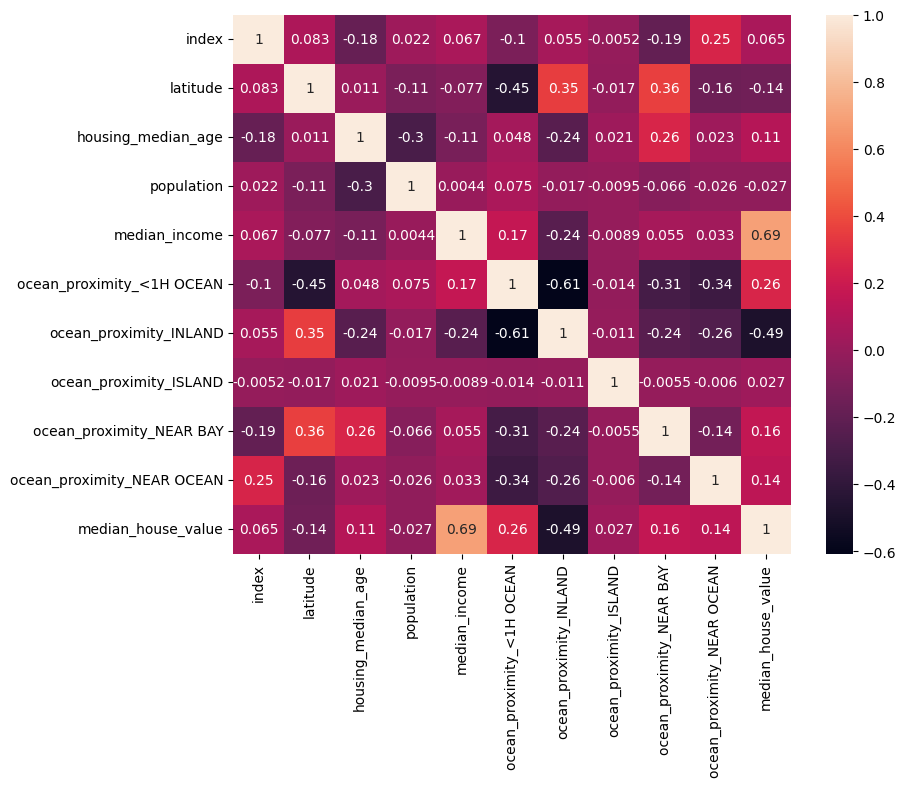

In [15]:
plt.figure(figsize=(9,7))
corr_matrix = immo_df4.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## feature importance

In [2]:
immo_df4 = pd.read_csv("immo_iteration10.csv")
immo_df4

,index,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,room_per_households
0,2072.0,-119.84,36.77,6.0,473.0,1397.0,1.4817,0.0,1.0,0.0,0.0,0.0,72000.0,4.443645
1,10600.0,-117.80,33.68,8.0,349.0,862.0,6.9133,1.0,0.0,0.0,0.0,0.0,274100.0,5.976471
2,2494.0,-120.19,36.60,25.0,214.0,931.0,1.5536,0.0,1.0,0.0,0.0,0.0,58300.0,4.088785
3,4284.0,-118.32,34.10,31.0,229.0,597.0,1.5284,1.0,0.0,0.0,0.0,0.0,200000.0,2.740088
4,16541.0,-121.23,37.79,21.0,373.0,1130.0,4.0815,0.0,1.0,0.0,0.0,0.0,117900.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,278.0,745.0,3.0625,0.0,1.0,0.0,0.0,0.0,93800.0,5.860000
16508,18898.0,-122.25,38.11,49.0,504.0,1131.0,2.6133,0.0,0.0,0.0,1.0,0.0,103100.0,5.163755
16509,11798.0,-121.22,38.92,19.0,461.0,1206.0,4.4958,0.0,1.0,0.0,0.0,0.0,192600.0,5.899767
16510,6637.0,-118.14,34.16,39.0,840.0,2546.0,2.5750,1.0,0.0,0.0,0.0,0.0,153500.0,3.591203


In [3]:
immo_df4=immo_df4[['index','longitude','latitude','housing_median_age','total_bedrooms','median_income','population','room_per_households','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','median_house_value']]
immo_df4

,index,longitude,latitude,housing_median_age,total_bedrooms,median_income,population,room_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,2072.0,-119.84,36.77,6.0,473.0,1.4817,1397.0,4.443645,0.0,1.0,0.0,0.0,0.0,72000.0
1,10600.0,-117.80,33.68,8.0,349.0,6.9133,862.0,5.976471,1.0,0.0,0.0,0.0,0.0,274100.0
2,2494.0,-120.19,36.60,25.0,214.0,1.5536,931.0,4.088785,0.0,1.0,0.0,0.0,0.0,58300.0
3,4284.0,-118.32,34.10,31.0,229.0,1.5284,597.0,2.740088,1.0,0.0,0.0,0.0,0.0,200000.0
4,16541.0,-121.23,37.79,21.0,373.0,4.0815,1130.0,5.166667,0.0,1.0,0.0,0.0,0.0,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,278.0,3.0625,745.0,5.860000,0.0,1.0,0.0,0.0,0.0,93800.0
16508,18898.0,-122.25,38.11,49.0,504.0,2.6133,1131.0,5.163755,0.0,0.0,0.0,1.0,0.0,103100.0
16509,11798.0,-121.22,38.92,19.0,461.0,4.4958,1206.0,5.899767,0.0,1.0,0.0,0.0,0.0,192600.0
16510,6637.0,-118.14,34.16,39.0,840.0,2.5750,2546.0,3.591203,1.0,0.0,0.0,0.0,0.0,153500.0


In [4]:
data = immo_df4
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [5]:
X

,index,longitude,latitude,housing_median_age,total_bedrooms,median_income,population,room_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072.0,-119.84,36.77,6.0,473.0,1.4817,1397.0,4.443645,0.0,1.0,0.0,0.0,0.0
1,10600.0,-117.80,33.68,8.0,349.0,6.9133,862.0,5.976471,1.0,0.0,0.0,0.0,0.0
2,2494.0,-120.19,36.60,25.0,214.0,1.5536,931.0,4.088785,0.0,1.0,0.0,0.0,0.0
3,4284.0,-118.32,34.10,31.0,229.0,1.5284,597.0,2.740088,1.0,0.0,0.0,0.0,0.0
4,16541.0,-121.23,37.79,21.0,373.0,4.0815,1130.0,5.166667,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099.0,-121.90,39.59,20.0,278.0,3.0625,745.0,5.860000,0.0,1.0,0.0,0.0,0.0
16508,18898.0,-122.25,38.11,49.0,504.0,2.6133,1131.0,5.163755,0.0,0.0,0.0,1.0,0.0
16509,11798.0,-121.22,38.92,19.0,461.0,4.4958,1206.0,5.899767,0.0,1.0,0.0,0.0,0.0
16510,6637.0,-118.14,34.16,39.0,840.0,2.5750,2546.0,3.591203,1.0,0.0,0.0,0.0,0.0


In [6]:
y

0         72000.0
1        274100.0
2         58300.0
3        200000.0
4        117900.0
           ...   
16507     93800.0
16508    103100.0
16509    192600.0
16510    153500.0
16511     81100.0
Name: median_house_value, Length: 16512, dtype: float64

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [8]:
model = ExtraTreesClassifier(max_depth=9)
model.fit(X,y)

ExtraTreesClassifier(max_depth=9)

In [9]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09604286 0.08508874 0.08065861 0.07743884 0.06614125 0.35014292
 0.06535209 0.10928234 0.01406183 0.03021022 0.00170177 0.01069768
 0.01318085]


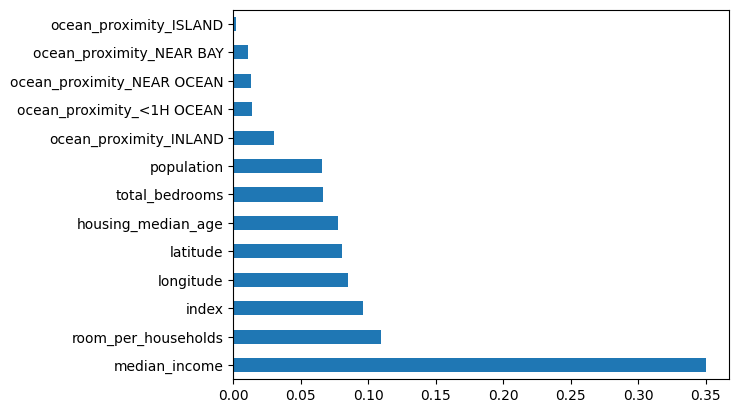

In [10]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()